In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n))

In [2]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

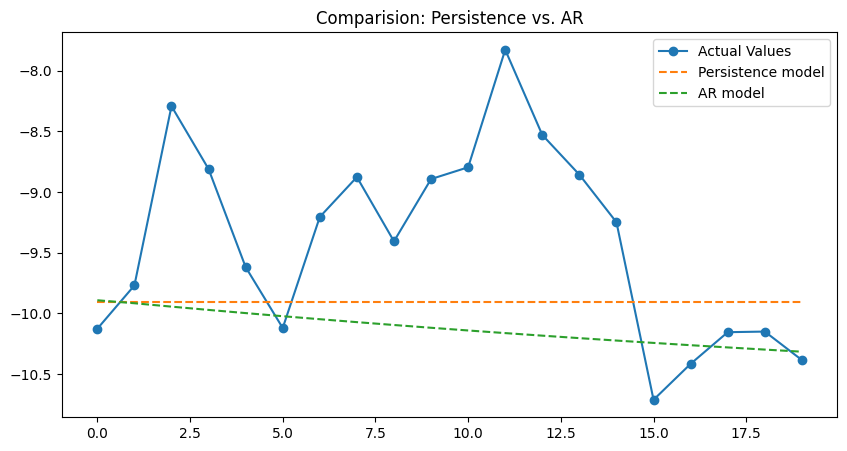

Persistence Model RMSE: 0.925
Autoregression Model RMSE: 1.036


In [3]:
def persistence(test, last_train_alue):
  predictions = [last_train_alue] * len(test)
  return predictions

predictions = persistence(test, train[-1])
persistence_rmse = np.sqrt( mean_squared_error(test, predictions))
lag = 3
ar_model = AutoReg(train, lags=lag).fit()
ar_predictions = ar_model.predict(start=len(train), end=len(train)+len(test)-1)
ar_rmse = np.sqrt(mean_squared_error(test, ar_predictions))

plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual Values', marker='o')
plt.plot(predictions, label='Persistence model', linestyle='dashed')
plt.plot(ar_predictions, label='AR model', linestyle='dashed')
plt.legend()
plt.title('Comparision: Persistence vs. AR')
plt.show()

print(f"Persistence Model RMSE: {persistence_rmse:.3f}")
print(f"Autoregression Model RMSE: {ar_rmse:.3f}")

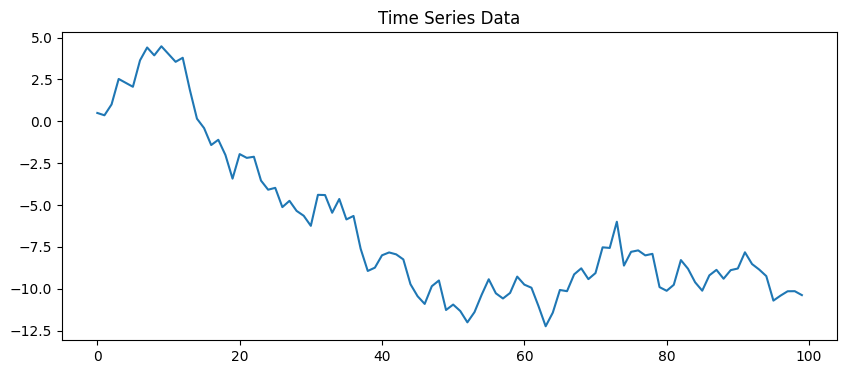

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n))
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Time Series Data')
plt.show()

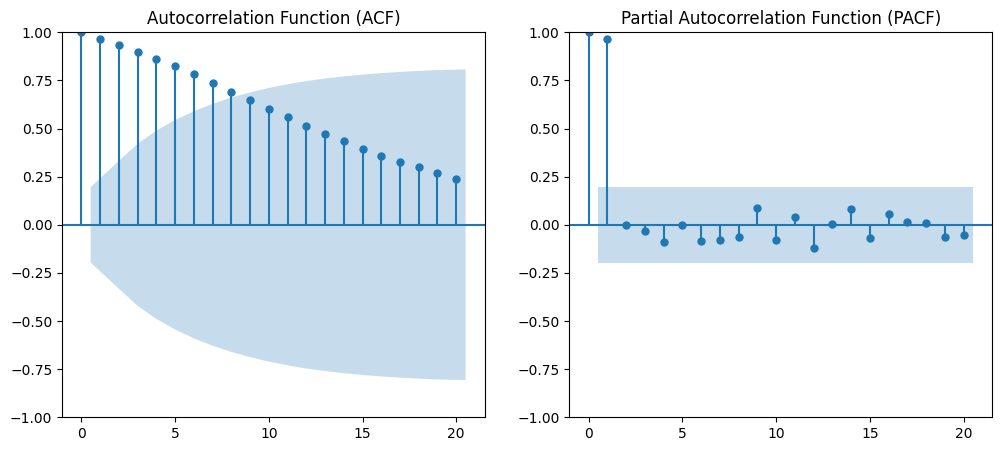

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [6]:
from re import X
train = data[:len(data)-7]
test = data[len(data)-7:]

In [7]:
model=AutoReg(train,lags=10)

In [8]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   93
Model:                    AutoReg(10)   Log Likelihood                -102.679
Method:               Conditional MLE   S.D. of innovations              0.834
Date:                Wed, 09 Apr 2025   AIC                            229.359
Time:                        09:11:06   BIC                            258.385
Sample:                            10   HQIC                           241.020
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7575      0.197     -3.849      0.000      -1.143      -0.372
y.L1           0.8548      0.107      7.958      0.000       0.644       1.065
y.L2          -0.0170      0.142     -0.120      0.9

In [9]:
print(len(train))

93


In [10]:
print(len(test))

7


In [12]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

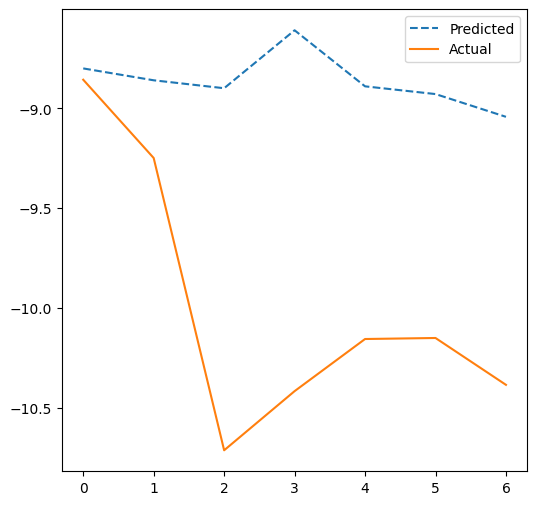

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(predictions,label='Predicted', linestyle='dashed')
plt.plot(test,label='Actual')
plt.legend()
plt.show()